In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
% matplotlib inline

In [4]:
n = pd.read_csv('../data/graph/user_beer_nodes_trade_edges.csv')[['id', 'modularity_class']]
beers = pd.read_csv('beers.csv', encoding='utf-8')[['id', 'name', 'style']]

In [5]:
df = pd.merge(n, beers, on=['id'], how='inner')
df = df[['id', 'style', 'modularity_class']]
df.head()

,id,style,modularity_class
0,4680,Belgian Quad,2
1,64,Winter Warmer,2
2,431,Czech Pilsener,2
3,1805,Dark Ale,1
4,3950,Imperial / Double IPA,1


/usr/local/lib/python2.7/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


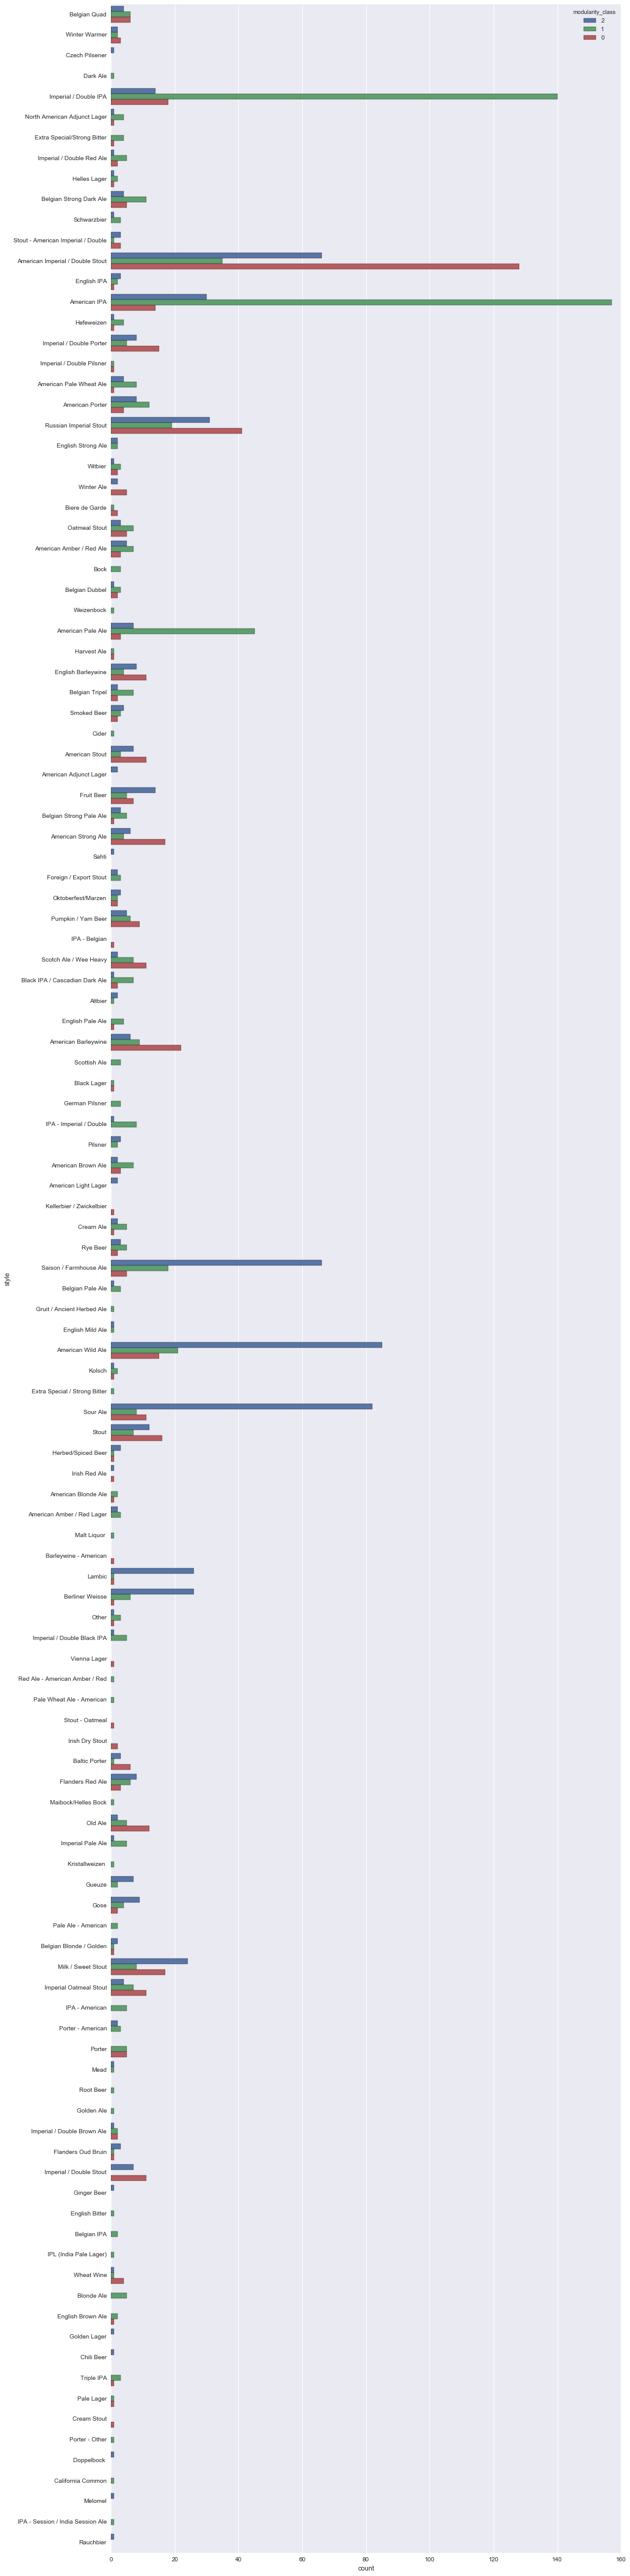

In [6]:
plt.figure(figsize=(15, 75))
sns.countplot(y='style', hue='modularity_class', data=df)
plt.show()

In [7]:
beers[beers['id'] == 13559]

,id,name,style
3099,13559,Zombie Dust,American Pale Ale


In [8]:
# count by mod_class styles
a = df.groupby(['modularity_class', 'style'], as_index=False).count()
# count by styles
b = df.groupby('style', as_index=False).count()
c = a.merge(b, on=['style'])
c = c.drop('modularity_class_y', axis=1)
c.columns = ['modularity_class', 'style', 'style_count', 'style_per']
c['style_per'] = c['style_count'] / c['style_per']
for mod_class in xrange(0, 13):
    print 'MOD CLASS: ' + str(mod_class)
    print
    print 'style count:'
    print c[c['modularity_class'] == mod_class].sort('style_count', ascending=False).head(10)[['style', 'style_count', 'style_per']]
    print
    print 'percent of total style count:'
    print c[c['modularity_class'] == mod_class].sort('style_per', ascending=False).head(10)[['style', 'style_count', 'style_per']]
    print
    print '----------------------'
    print

MOD CLASS: 0

style count:
                                style  style_count  style_per
14   American Imperial / Double Stout          128   0.558952
161            Russian Imperial Stout           41   0.450549
3                 American Barleywine           22   0.594595
110             Imperial / Double IPA           18   0.104651
136                Milk / Sweet Stout           17   0.346939
29                American Strong Ale           17   0.629630
179                             Stout           16   0.457143
115          Imperial / Double Porter           15   0.535714
32                  American Wild Ale           15   0.123967
11                       American IPA           14   0.069652

percent of total style count:
                        style  style_count  style_per
188              Vienna Lager            1   1.000000
185           Stout - Oatmeal            1   1.000000
129  Kellerbier / Zwickelbier            1   1.000000
38      Barleywine - American            1  

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:13: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:16: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


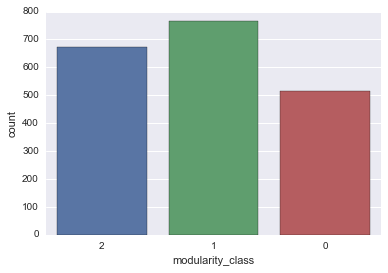

In [9]:
sns.countplot('modularity_class', data=df)